In [9]:
!pip install transformers datasets
!pip install transformers datasets -q
!pip install datasets
!pip install imblearn
!pip install datasets transformers scikit-learn --quiet
!pip install -q transformers datasets evaluate accelerate
!pip install transformers==4.49.0 datasets==3.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [1]:
!pip freeze | grep -i transformers
!pip freeze | grep -i datasets

sentence-transformers==3.4.1
transformers==4.50.0
tensorflow-datasets==4.9.8
vega-datasets==0.9.0


In [2]:
import pandas as pd

lfc_lda_url = 'https://raw.githubusercontent.com/WinNatch/UoB_SM-WA/main/LFC_LDA.csv'

lfc_df = pd.read_csv(lfc_lda_url)

print(lfc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7547 entries, 0 to 7546
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        7547 non-null   object
 1   time        1970 non-null   object
 2   headline    7547 non-null   object
 3   news_text   7547 non-null   object
 4   reporter    7547 non-null   object
 5   news        7547 non-null   object
 6   clean_news  7547 non-null   object
 7   lda_no      7547 non-null   int64 
 8   lda_topic   5624 non-null   object
dtypes: int64(1), object(8)
memory usage: 530.8+ KB
None


In [3]:
lda_topic_mapping = {
    "24-25 Summer Market": "Summer Market",
    "Salah Contract Renew": "Mohamed Salah",
    "LFC-Alonso": "Klopp Replacement",
    "LFC Derby Drama": "Performance Analysis",
    "VanDijk Contract Renew": "Van Dijk"
}
lfc_df["lda_topic"] = lfc_df["lda_topic"].replace(lda_topic_mapping)

In [4]:
import pandas as pd

lfc_url = "https://github.com/WinNatch/UoB_SM-WA/raw/main/lfc_sen_new.xlsx"
lfc_stm = pd.read_excel(lfc_url)

lda_topic_mapping = {
    "24-25 Summer Market": "Summer Market",
    "Salah contract": "Mohamed Salah",
    "LFC-Alonso": "Klopp Replacement",
    "LFC Derby": "Performance Analysis",
    "VanDijk Contract Renew": "Van Dijk"
}
lfc_stm["lda_topic"] = lfc_stm["lda_topic"].replace(lda_topic_mapping)

lfc_stm = lfc_stm.drop(columns=["time"], errors="ignore")

lfc_stm = lfc_stm[lfc_stm["news_text"].notna()]
lfc_stm = lfc_stm[lfc_stm["news_text"].str.strip() != ""]

lfc_stm.head()

,date,headline,news_text,reporter,news,clean_news,lda_no,lda_topic,month,Sentiment_M,vader_label,new_sentiment
0,5/1/2024,Jurgen Klopp could get surprise new job offer ...,Jurgen Klopp will take a deserved break follow...,ThisIsAnfield,Jurgen Klopp could get surprise new job offer ...,jurgen klopp could get surprise new job offer ...,7,Klopp Last Season,2024-05,Neutral,Negative,Neutral
1,2/14/2025,Aston Villa made IMPOSSIBLE request to move Li...,Aston Villa have seen a strange request to res...,ThisIsAnfield,Aston Villa made IMPOSSIBLE request to move Li...,aston villa made impossible request move fixtu...,5,Matchday Promote,2025-02,Neutral,Negative,Negative
2,10/23/2024,Leipzig 0-1 Liverpool: Nunez goal provides pro...,"It wasn??t a classic but it needn??t to be, ...",ThisIsAnfield,Leipzig 0-1 Liverpool: Nunez goal provides pro...,leipzig nunez goal provides professional europ...,-1,NaN,2024-10,Positive,Positive,Positive
3,3/2/2025,"Female Liverpool fans may be in for ""surprise""...",With International Women??s Day around the co...,ThisIsAnfield,"Female Liverpool fans may be in for ""surprise""...",female fans may surprise inspiring event next ...,43,LFC Women Team,2025-03,Positive,Positive,Positive
4,3/2/2024,"""I would never try to wind Darwin up!"" - Jurge...",Darwin Nunez??s introduction from the bench s...,ThisIsAnfield,"""I would never try to wind Darwin up!"" - Jurge...",would never try wind darwin jurgen klopp st an...,-1,NaN,2024-03,Negative,Positive,Positive


**Sentiment Analysis**

In [5]:
from nltk.corpus import stopwords
from nltk import download

download('stopwords')

nltk_stopwords = set(stopwords.words("english"))

custom_stopwords_sen = nltk_stopwords.union({
    # Coaching Staff 2023–2024 Season
    'jurgen', 'klopp', 'klopps', 'pepijn', 'lijnders', 'peter', 'krawietz',
    'john', 'achterberg', 'claudio', 'taffarel', 'andreas', 'kornmayer',

    # Common football terms
    'match', 'goal', 'win', 'team', 'game', 'club', 'cup', 'season', 'player', 'manager', 'centre', 'back', 'football', 'wembley',
    'squad', 'side', 'performance', 'victory', 'score', 'final', 'campaign', 'start', 'position', 'result', 'supporter', 'end',
    'sport', 'defender', 'midfielder', 'forward', 'captain', 'goalkeeper', 'playmaker', 'teammate', 'fixture', 'fan', 'point', 'striker',
    'draw', 'competition', 'title', 'training', 'sign', 'signing', 'deal', 'offer', 'loan', 'penalty', 'scored', 'transfer', 'window',

    # Tournament Name
    'premier', 'league', 'ucl', 'europa', 'carabao', 'fa', 'uefa', 'fifa', 'championship', 'champion',

    # Days of the week and time related word
    'sunday', 'saturday', 'wednesday', 'friday', 'tuesday', 'monday', 'thursday', 'weekend', 'year', 'night', 'evening', 'afternoon', 'morning', 'preseason',

    # Months of the year
    'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',

    # Common football/journalistic phrases
    'last', 'summer', 'may', 'made', 'confirmed', 'following', 'next', 'take', 'put',
    'left', 'face', 'level', 'lot', 'half', 'record', 'former', 'strong', 'contract',
    'likely', 'expect', 'number', 'report', 'weekend', 'home', 'away', 'say', 'told', 'early', 'break', 'international', 'keep', 'kept',

    # Managerial words
    'coach', 'head', 'role', 'manager',

    # Number
    'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty',

    # Miscellaneous filler words
    'one', 'back', 'away', 'though', 'far', 'way', 'big', 'moment', 'move', 'made', 'take', 'news',
    'time', 'plan', 'really', 'change', 'need', 'always', 'think', 'given', 'england', 'big', 'man',

    # Other unnecessary terms
    'yearold', 'today', 'yesterday', 'tomorrow', 'said', 'says', 'week', 'month', 'day', 'already', 'new', 'thing',
    'still', 'good', 'best', 'first', 'second', 'time', 'minute', 'another', 'expected', 'well', 'thought', 'want', 'await',
    'going', 'know', 'needed', 'return', 'start', 'change', 'talk', 'chance', 'show', 'play', 'played', 'everything', 'every',

    # Liverpool-related terms (team, stadium, sponsors)
    'liverpool', 'lfc', 'anfield', 'axa', 'carabao', 'reds', 'kop', 'scouser', 'ynwa', 'merseyside', 'red',

    # Coaching Staff 2024–2025 Season
    'arne', 'slot', 'sipke', 'hulshoff', 'john', 'heitinga', 'fabian', 'otte',
    'claudio', 'taffarel', 'aaron', 'briggs', 'jonathan', 'power', 'lee', 'nobes',
    'conall', 'murtagh', 'ruben', 'peeters', 'chris', 'morgan', 'amit', 'pannu',
    'robin', 'sadler', 'paul', 'small', 'lee', 'radcliffe', 'brendan', 'mcilduff',
    'david', 'rydings', 'mona', 'nemmer', 'james', 'french', 'chris', 'black',
    'joe', 'lewis', 'clare', 'farrell', 'yinka', 'ademuyiwa', 'michelle', 'hudson', 'lynsey', 'ahmed',

    # Filler Words
    'see', 'look', 'came', 'came', 'making', 'taking', 'set', 'came', 'give', 'got', 'ahead', 'saw', 'yet', 'without', 'make', 'come',
    'remain', 'early', 'late', 'interest', 'decision', 'including', 'revealed', 'situation', 'part', 'much', 'place', 'visit', 'many', 'right',
    'charge', 'situation', 'explain', 'hope', 'better', 'key', 'due', 'stay', 'came', 'future', 'past', 'leave', 'recent', 'almost', 'include',

    # Fenway Sports Group (FSG) & Key Personnel
    'fsg', 'fenway', 'sports', 'group',  # Adding "FSG" and its variations
    'john', 'henry', 'tom', 'werner', 'michael', 'gordon', 'sam', 'kennedy',
    'lebron', 'james', 'maverick', 'carter', 'paul', 'wachter', 'adam', 'grossman',
    'ryan', 'fischer', 'theo', 'epstein', 'billy', 'hogan', 'ed', 'weiss', 'julie', 'swinehart',

    # Player names
    'alisson', 'adrian', 'caoimhin', 'kelleher', 'trent', 'alexanderarnold', 'alexander', 'arnold',
    'joe', 'gomez', 'virgil', 'van', 'dijk', 'ibrahima', 'konate', 'joel', 'matip', 'mohame',
    'andrew', 'robertson', 'kostas', 'tsimikas', 'nat', 'phillips', 'rhys', 'williams',
    'jarell', 'quansah', 'conor', 'bradley', 'amara', 'nallo', 'wataru', 'endo', 'thiago',
    'dominik', 'szoboszlai', 'alexis', 'mac', 'allister', 'curtis', 'jones', 'harvey', 'elliott',
    'ryan', 'gravenberch', 'tyler', 'morton', 'bobby', 'clark', 'stefan', 'bajcetic',
    'james', 'mcconnell', 'luis', 'diaz', 'darwin', 'nunez', 'mohamed', 'salah', 'diogo', 'jota',
    'cody', 'gakpo', 'federico', 'chiesa', 'kaide', 'gordon', 'ben', 'doak', 'lewis', 'koumas',
    'jayden', 'danns', 'vitezslav', 'jaros', 'harvey', 'davies',

    # Liverpool FC Opponents from January 2024 to March 2025
    'newcastle', 'united', 'afc', 'bournemouth', 'chelsea', 'arsenal', 'burnley',
    'brentford', 'luton', 'town', 'nottingham', 'forest', 'manchester', 'city',
    'brighton', 'hove', 'albion', 'sheffield', 'crystal', 'palace', 'fulham',
    'everton', 'west', 'ham', 'tottenham', 'hotspur', 'aston', 'villa',
    'wolverhampton', 'wanderers', 'ipswich', 'southampton', 'leicester', 'wolf',

    # UEFA Champions League & Europa League Opponents
    'milan', 'bologna', 'rb', 'leipzig', 'real', 'madrid', 'girona', 'psv', 'eindhoven',
    'lille', 'psg', 'paris', 'saintgermain', 'lask', 'union', 'gilloise', 'toulouse',
    'sparta', 'prague', 'atalanta', 'leverkusen'
})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import re
import spacy
from nltk.corpus import stopwords
from nltk import download
from tqdm import tqdm

lfc_df = lfc_df[lfc_df["news_text"].notna()]
lfc_df = lfc_df[lfc_df["news_text"].str.strip() != ""]

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def build_full_text(df):
    df['headline'] = df['headline'].fillna('').astype(str)
    df['news_text'] = df['news_text'].fillna('').astype(str)
    df['full_text'] = df['headline'] + ' ' + df['news_text']
    return df

lfc_stm = build_full_text(lfc_stm)
lfc_df = build_full_text(lfc_df)

def clean_and_lemmatize(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|[^a-z\s]", " ", text)
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.lemma_ not in custom_stopwords_sen and len(token.lemma_) > 2 and token.is_alpha
    ]
    return " ".join(tokens)

tqdm.pandas()
lfc_stm['clean_news_st'] = lfc_stm['full_text'].progress_apply(clean_and_lemmatize)
lfc_df['clean_news_st'] = lfc_df['full_text'].progress_apply(clean_and_lemmatize)
lfc_stm['clean_head_st'] = lfc_stm['headline'].progress_apply(clean_and_lemmatize)
lfc_df['clean_head_st'] = lfc_df['headline'].progress_apply(clean_and_lemmatize)

100%|██████████| 7547/7547 [00:20<00:00, 373.45it/s]


In [7]:
print(lfc_stm.info())
print(lfc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1001 non-null   object
 1   headline       1001 non-null   object
 2   news_text      1001 non-null   object
 3   reporter       1001 non-null   object
 4   news           1001 non-null   object
 5   clean_news     1001 non-null   object
 6   lda_no         1001 non-null   int64 
 7   lda_topic      740 non-null    object
 8   month          1001 non-null   object
 9   Sentiment_M    1001 non-null   object
 10  vader_label    1001 non-null   object
 11  new_sentiment  1001 non-null   object
 12  full_text      1001 non-null   object
 13  clean_news_st  1001 non-null   object
 14  clean_head_st  1001 non-null   object
dtypes: int64(1), object(14)
memory usage: 117.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7547 entries, 0 to 7546
Data columns (total 12 columns

<ipython-input-18-063754e95c9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-18-063754e95c9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-18-063754e95c9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


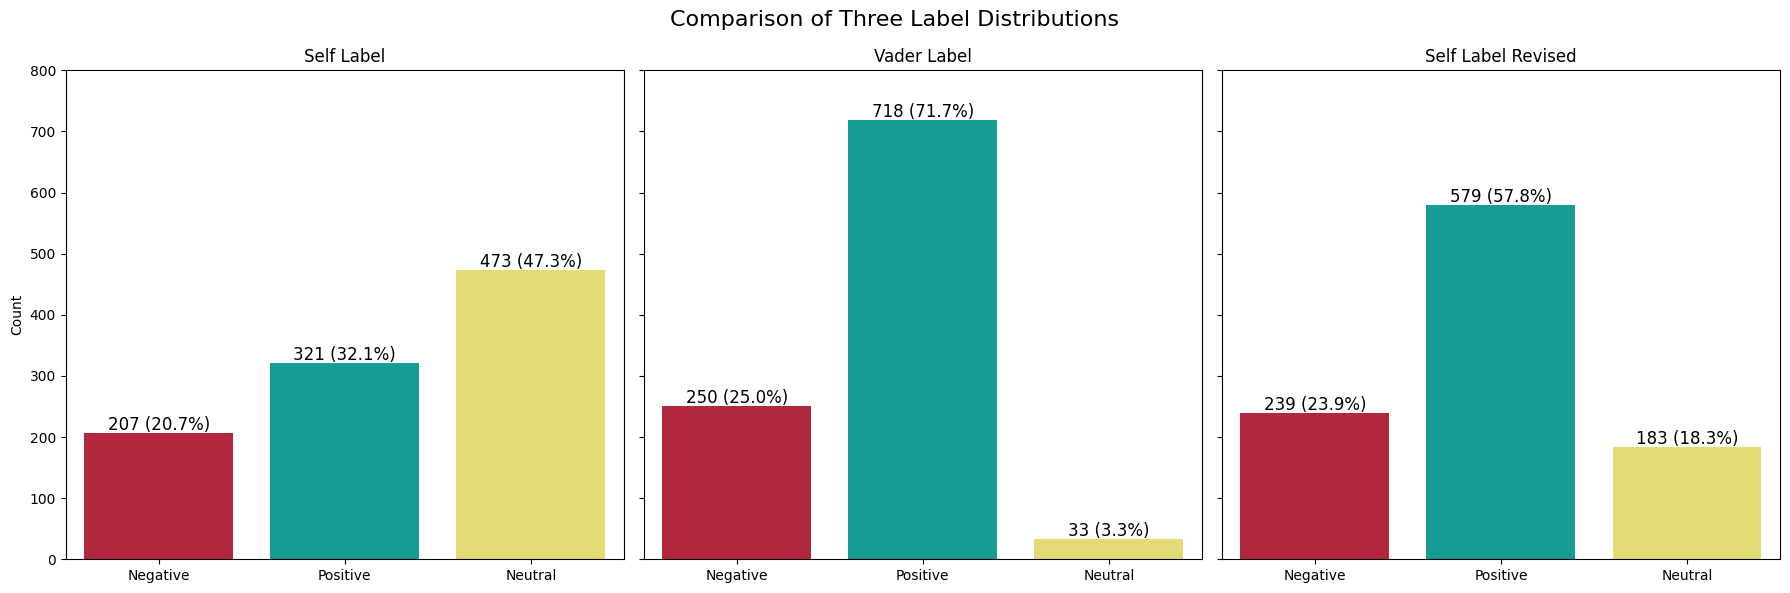

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

color_map = {
    "Negative": "#C8102E",
    "Positive": "#00B2A9",
    "Neutral": "#F6EB61",
}

def plot_three_distributions(dist1, dist2, dist3, label_order):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    dists = [dist1, dist2, dist3]
    titles = ["Self Label", "Vader Label", "Self Label Revised"]

    for ax, data, title in zip(axes, dists, titles):
        total = data.sum()
        sns.barplot(
            x=data.index,
            y=data.values,
            ax=ax,
            palette=[color_map[label] for label in label_order],
            order=label_order
        )

        for i, v in enumerate(data[label_order]):
            ax.text(i, v + 5, f"{v} ({v/total:.1%})", ha='center', fontsize=12)

        ax.set_title(title)
        ax.set_ylabel("Count")
        ax.set_xlabel("")

        ax.set_ylim(0, 800)

    fig.suptitle("Comparison of Three Label Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()

label_order = ["Negative", "Positive", "Neutral"]
dist1 = lfc_stm['Sentiment_M'].value_counts()
dist2 = lfc_stm['vader_label'].value_counts()
dist3 = lfc_stm['new_sentiment'].value_counts()

plot_three_distributions(dist1, dist2, dist3, label_order)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

color_map = {
    "Negative": "#C8102E",
    "Positive": "#00B2A9",
    "Neutral": "#F6EB61",
}

label_counts_before = lfc_stm['new_sentiment'].value_counts()

def plot_label_distribution(before, after, label_order):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    for ax, data, title in zip(
        axes,
        [before, after],
        ["Before SMOTE", "70% Train Set (After SMOTE)"]
    ):
        total = data.sum()
        sns.barplot(
            x=data.index,
            y=data.values,
            ax=ax,
            palette=[color_map[label] for label in label_order],
            order=label_order
        )
        for i, v in enumerate(data[label_order]):
            ax.text(i, v + 5, f"{v} ({v/total:.1%})", ha='center', fontsize=12)
        ax.set_title(title)
        ax.set_ylabel("Count")
        ax.set_xlabel("Sentiment")
        ax.set_ylim(0, 700)
    fig.suptitle("Sentiment Label Distribution: Before vs After SMOTE", fontsize=16)
    plt.tight_layout()
    plt.show()

<ipython-input-19-3a420c4b9aa6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-3a420c4b9aa6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


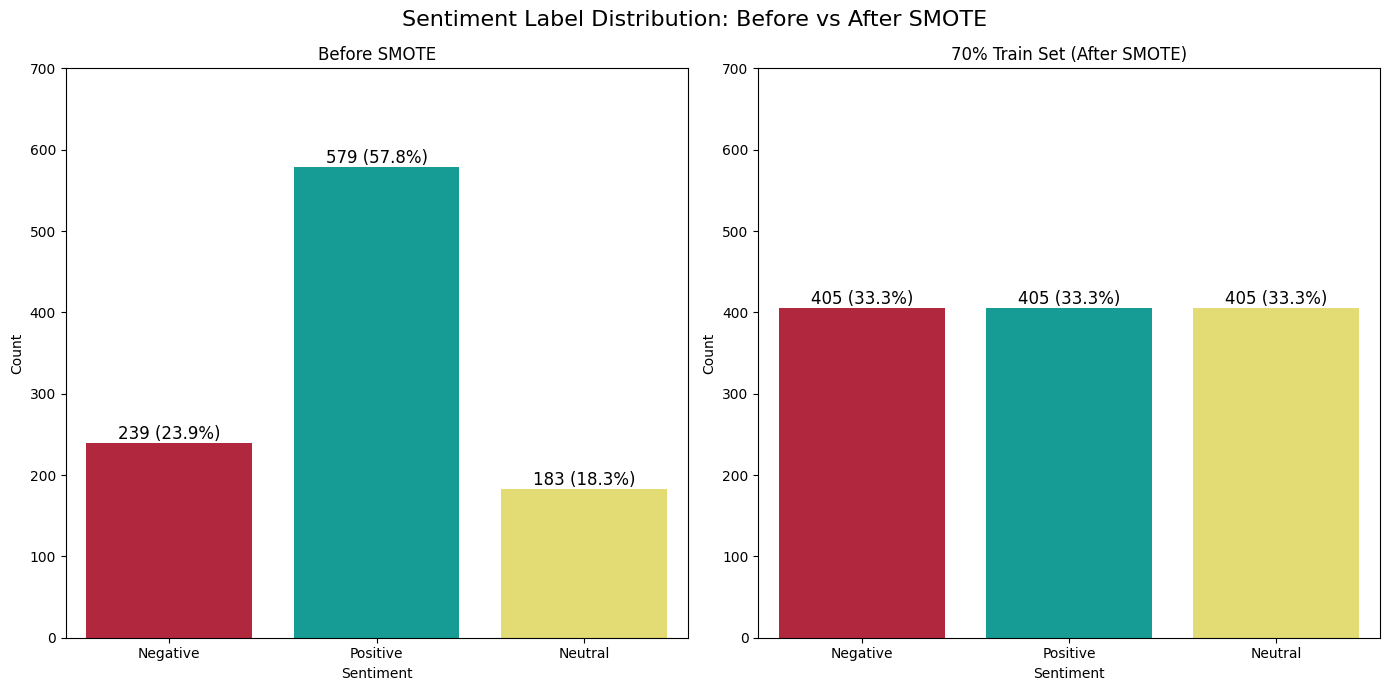

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le = LabelEncoder()
lfc_stm['label'] = le.fit_transform(lfc_stm['new_sentiment'])

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(lfc_stm['clean_news_st'])
y = lfc_stm['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

after_counts = pd.Series(le.inverse_transform(y_train_resampled)).value_counts()

label_order = ["Negative", "Positive", "Neutral"]
plot_label_distribution(label_counts_before, after_counts, label_order)

**COMBINED TEXT MODEL**

In [21]:
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments)
import torch
import evaluate
import numpy as np
import random

sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}

id2label = {v: k for k, v in sentiment_mapping.items()}
label2id = sentiment_mapping

lfc_stm['label'] = lfc_stm['new_sentiment'].map(sentiment_mapping)

train_df, test_df = train_test_split(
    lfc_stm[['clean_news_st', 'label']],
    test_size=0.3,
    stratify=lfc_stm['label'],
    random_state=42
)

counts = train_df['label'].value_counts()
max_count = counts.max()

df_list = []
for label, cnt in counts.items():
    subset = train_df[train_df['label'] == label]
    oversampled_subset = subset.sample(n=max_count, replace=True, random_state=42)
    df_list.append(oversampled_subset)

train_df_oversampled = pd.concat(df_list, ignore_index=True)
train_df_oversampled = train_df_oversampled.sample(frac=1.0, random_state=42).reset_index(drop=True)

print("Class distribution after oversampling:")
print(train_df_oversampled['label'].value_counts())

hf_dataset = {
    "train": Dataset.from_pandas(train_df_oversampled.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True))
}

Class distribution after oversampling:
label
0    405
2    405
1    405
Name: count, dtype: int64


In [73]:
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

def fine_tune_model(model_ckpt, output_dir):
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

    def tokenize(batch):
        return tokenizer(batch["clean_news_st"], truncation=True, padding=True)

    tokenized_ds = {
        "train": hf_dataset["train"].map(tokenize, batched=True),
        "test": hf_dataset["test"].map(tokenize, batched=True)
    }

    model = AutoModelForSequenceClassification.from_pretrained(
        model_ckpt,
        num_labels=len(label2id),
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir=f"{output_dir}/logs",
        num_train_epochs=5,
        per_device_train_batch_size=18,
        per_device_eval_batch_size=18,
        learning_rate=4e-5,
        weight_decay=0.01,
        warmup_ratio=0.06,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_ds["train"],
        eval_dataset=tokenized_ds["test"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()

    return model, tokenizer, trainer, tokenized_ds

In [23]:
def predict_sentiment(df, model, tokenizer, col_name, batch_size=32):
    model.eval()
    device = model.device

    texts = df['clean_news_st'].dropna().tolist()
    preds = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, return_tensors="pt")
        encodings = {k: v.to(device) for k, v in encodings.items()}

        with torch.no_grad():
            outputs = model(**encodings)
            batch_preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            preds.extend(batch_preds)

    df = df.copy()
    df = df.loc[df['clean_news_st'].notna()].reset_index(drop=True)
    df[col_name] = [id2label[p] for p in preds]

    return df

In [24]:
def predict_sentiment_h(df, model, tokenizer, col_name, batch_size=32):
    model.eval()
    device = model.device

    texts = df['clean_head_st'].dropna().tolist()
    preds = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, return_tensors="pt")
        encodings = {k: v.to(device) for k, v in encodings.items()}

        with torch.no_grad():
            outputs = model(**encodings)
            batch_preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            preds.extend(batch_preds)

    df = df.copy()
    df = df.loc[df['clean_head_st'].notna()].reset_index(drop=True)
    df[col_name] = [id2label[p] for p in preds]

    return df

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

bert_model, bert_tokenizer, bert_trainer, bert_tokenized_ds = fine_tune_model("bert-base-uncased", "./bert")

bert_train_results = bert_trainer.evaluate(eval_dataset=bert_tokenized_ds["train"])
bert_test_results = bert_trainer.evaluate(eval_dataset=bert_tokenized_ds["test"])

print("BERT Train Accuracy:", bert_train_results.get("eval_accuracy"))
print("BERT Test Accuracy:", bert_test_results.get("eval_accuracy"))

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/301 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-23-ef5851039571>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.971429,0.578073
2,No log,0.890126,0.601329
3,No log,0.830003,0.647841
4,No log,1.006749,0.634551
5,No log,0.946019,0.651163


BERT Train Accuracy: 0.9014285714285715
BERT Test Accuracy: 0.6511627906976745


In [ ]:
# Fine-tune RoBERTa model
roberta_model, roberta_tokenizer, roberta_trainer, roberta_tokenized_ds = fine_tune_model("roberta-base", "./roberta")

roberta_train_results = roberta_trainer.evaluate(eval_dataset=roberta_tokenized_ds["train"])
roberta_test_results = roberta_trainer.evaluate(eval_dataset=roberta_tokenized_ds["test"])

print("RoBERTa Train Accuracy:", roberta_train_results.get("eval_accuracy"))
print("RoBERTa Test Accuracy:", roberta_test_results.get("eval_accuracy"))

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/301 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-23-ef5851039571>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.973523,0.578073
2,No log,0.970339,0.578073
3,No log,0.970393,0.578073
4,No log,0.973234,0.578073
5,No log,0.971243,0.578073


RoBERTa Train Accuracy: 0.5785714285714286
RoBERTa Test Accuracy: 0.5780730897009967


In [ ]:
# Fine-tune ELECTRA model
electra_model, electra_tokenizer, electra_trainer, electra_tokenized_ds = fine_tune_model(
    "google/electra-base-discriminator", "./electra"
)

electra_train_results = electra_trainer.evaluate(eval_dataset=electra_tokenized_ds["train"])
electra_test_results = electra_trainer.evaluate(eval_dataset=electra_tokenized_ds["test"])

print("ELECTRA Train Accuracy:", electra_train_results.get("eval_accuracy"))
print("ELECTRA Test Accuracy:", electra_test_results.get("eval_accuracy"))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/301 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-23-ef5851039571>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.965415,0.578073
2,No log,0.897438,0.578073
3,No log,0.863225,0.644518
4,No log,0.908369,0.641196
5,No log,0.929946,0.621262


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

ELECTRA Train Accuracy: 0.73
ELECTRA Test Accuracy: 0.6445182724252492


In [ ]:
# Fine-tune DeBERTa-v3-base model
deberta_model, deberta_tokenizer, deberta_trainer, deberta_tokenized_ds = fine_tune_model(
    "microsoft/deberta-v3-base", "./deberta"
)

deberta_train_results = deberta_trainer.evaluate(eval_dataset=deberta_tokenized_ds["train"])
deberta_test_results = deberta_trainer.evaluate(eval_dataset=deberta_tokenized_ds["test"])

print("DeBERTa Train Accuracy:", deberta_train_results.get("eval_accuracy"))
print("DeBERTa Test Accuracy:", deberta_test_results.get("eval_accuracy"))

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/301 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-23-ef5851039571>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.972011,0.578073
2,No log,0.976070,0.578073
3,No log,0.902288,0.561462
4,No log,1.014528,0.621262
5,No log,0.855015,0.634551


model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

DeBERTa Train Accuracy: 0.6771428571428572
DeBERTa Test Accuracy: 0.6345514950166113


In [74]:
import os
os.environ["WANDB_DISABLED"] = "true"

twitter_model, twitter_tokenizer, twitter_trainer, twitter_tokenized_ds = fine_tune_model(
    "cardiffnlp/twitter-roberta-base-sentiment",
    "./twitter"
)

twitter_train_results = twitter_trainer.evaluate(eval_dataset=twitter_tokenized_ds["train"])
twitter_test_results = twitter_trainer.evaluate(eval_dataset=twitter_tokenized_ds["test"])

print("Twitter-RoBERTa Train Accuracy:", twitter_train_results.get("eval_accuracy"))
print("Twitter-RoBERTa Test Accuracy:", twitter_test_results.get("eval_accuracy"))

lfc_df = predict_sentiment(lfc_df, twitter_model, twitter_tokenizer, "twt_rbt_pred")
lfc_df = predict_sentiment_h(lfc_df, twitter_model, twitter_tokenizer, "twt_rbt_pred_head")

save_path = "./twitter-roberta-finetuned"
twitter_model.save_pretrained(save_path)
twitter_tokenizer.save_pretrained(save_path)

print(f"Model and tokenizer saved to: {save_path}")
print(lfc_df.head())

Map:   0%|          | 0/1215 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/301 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-73-c9f7334fdc68>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.940458,0.584718
2,No log,1.270969,0.548173
3,No log,1.827327,0.624585
4,No log,1.914607,0.661130
5,No log,2.092599,0.677741


Twitter-RoBERTa Train Accuracy: 0.9958847736625515
Twitter-RoBERTa Test Accuracy: 0.6777408637873754
Model and tokenizer saved to: ./twitter-roberta-finetuned
         date      time                                           headline  \
0  2025-03-17  17:48:00  'Everything was sunshine and rainbows' - Van Dijk   
1  2025-03-17  15:14:00    Is Salah's cup finals record his Achilles heel?   
2  2025-03-17  15:00:00        Liverpool 'can suffer' final defeat - James   
3  2025-03-17  13:55:00              'We want to bounce back, and we will'   
4  2025-03-17  12:06:00          'Lack of quality depth must be addressed'   

                                           news_text reporter  \
0  Liverpool captain Virgil van Dijk says "good t...      BBC   
1  Alongside his team-mates, it was a difficult d...      BBC   
2  Former Liverpool goalkeeper David James says L...      BBC   
3  Liverpool captain Virgil van Dijk on Instagram...      BBC   
4  In the space of a week, the Arne Slot machin

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

colors = ["#F6EB61", "#C8102E"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red_yellow", colors, N=256)

class_names = ["Negative", "Neutral", "Positive"]

def evaluate_transformer_model(name, trainer, ds_train, ds_test):
    train_predictions = trainer.predict(ds_train)
    train_preds = np.argmax(train_predictions.predictions, axis=-1)
    train_labels = train_predictions.label_ids
    train_acc = accuracy_score(train_labels, train_preds)

    test_predictions = trainer.predict(ds_test)
    test_preds = np.argmax(test_predictions.predictions, axis=-1)
    test_labels = test_predictions.label_ids
    test_acc = accuracy_score(test_labels, test_preds)

    print(f"\n📊 {name} Evaluation")
    print("-" * 40)
    print("Train Accuracy:", round(train_acc, 4))
    print("Test Accuracy :", round(test_acc, 4))

    print("\nClassification Report (Test):")
    print(classification_report(test_labels, test_preds, target_names=class_names))

    cm_test = confusion_matrix(test_labels, test_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


📊 Twitter-RoBERTa Evaluation
----------------------------------------
Train Accuracy: 0.8314
Test Accuracy : 0.7143

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.66      0.74      0.70        72
     Neutral       0.67      0.15      0.24        55
    Positive       0.74      0.89      0.80       174

    accuracy                           0.71       301
   macro avg       0.69      0.59      0.58       301
weighted avg       0.71      0.71      0.68       301



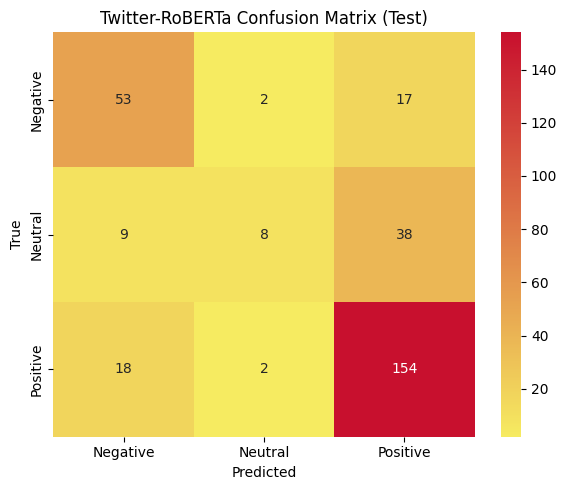


📊 BERT Evaluation
----------------------------------------
Train Accuracy: 0.9014
Test Accuracy : 0.6512

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.70      0.53      0.60        72
     Neutral       0.39      0.44      0.41        55
    Positive       0.72      0.77      0.75       174

    accuracy                           0.65       301
   macro avg       0.61      0.58      0.59       301
weighted avg       0.66      0.65      0.65       301



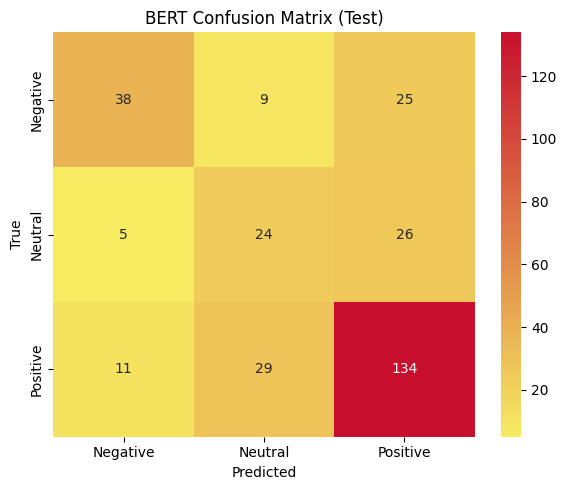


📊 RoBERTa Evaluation
----------------------------------------
Train Accuracy: 0.5786
Test Accuracy : 0.5781

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        72
     Neutral       0.00      0.00      0.00        55
    Positive       0.58      1.00      0.73       174

    accuracy                           0.58       301
   macro avg       0.19      0.33      0.24       301
weighted avg       0.33      0.58      0.42       301



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


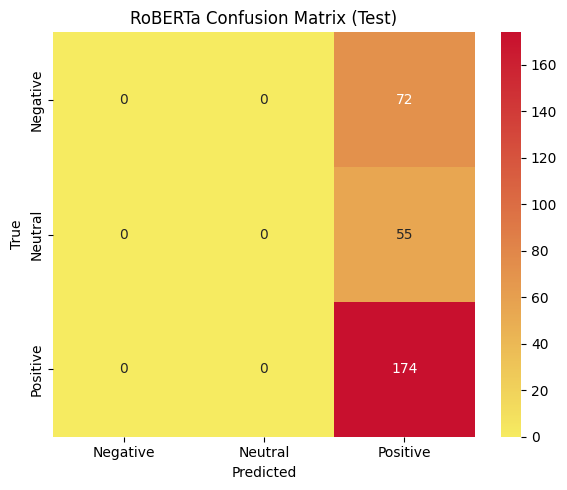


📊 DeBERTa Evaluation
----------------------------------------
Train Accuracy: 0.6771
Test Accuracy : 0.6346

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.49      0.76      0.60        72
     Neutral       0.00      0.00      0.00        55
    Positive       0.72      0.78      0.75       174

    accuracy                           0.63       301
   macro avg       0.40      0.52      0.45       301
weighted avg       0.53      0.63      0.58       301



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


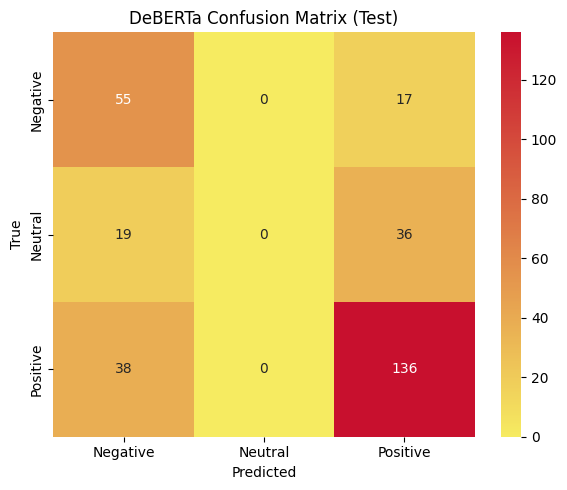


📊 ELECTRA Evaluation
----------------------------------------
Train Accuracy: 0.73
Test Accuracy : 0.6445

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.58      0.50      0.54        72
     Neutral       0.00      0.00      0.00        55
    Positive       0.66      0.91      0.77       174

    accuracy                           0.64       301
   macro avg       0.41      0.47      0.43       301
weighted avg       0.52      0.64      0.57       301



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


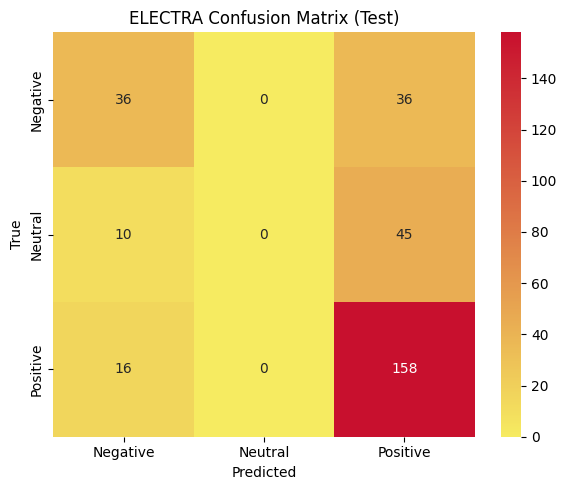

In [ ]:
evaluate_transformer_model(
    name="Twitter-RoBERTa",
    trainer=twitter_trainer,
    ds_train=twitter_tokenized_ds["train"],
    ds_test=twitter_tokenized_ds["test"]
)

evaluate_transformer_model(
    name="BERT",
    trainer=bert_trainer,
    ds_train=bert_tokenized_ds["train"],
    ds_test=bert_tokenized_ds["test"]
)

evaluate_transformer_model(
    name="RoBERTa",
    trainer=roberta_trainer,
    ds_train=roberta_tokenized_ds["train"],
    ds_test=roberta_tokenized_ds["test"]
)

evaluate_transformer_model(
    name="DeBERTa",
    trainer=deberta_trainer,
    ds_train=deberta_tokenized_ds["train"],
    ds_test=deberta_tokenized_ds["test"]
)

evaluate_transformer_model(
    name="ELECTRA",
    trainer=electra_trainer,
    ds_train=electra_tokenized_ds["train"],
    ds_test=electra_tokenized_ds["test"]
)


📊 Logistic Regression Evaluation
----------------------------------------
Train Accuracy: 0.9835
Test Accuracy : 0.6478

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.63      0.53      0.58        72
     Neutral       0.46      0.29      0.36        55
    Positive       0.68      0.81      0.74       174

    accuracy                           0.65       301
   macro avg       0.59      0.54      0.56       301
weighted avg       0.63      0.65      0.63       301



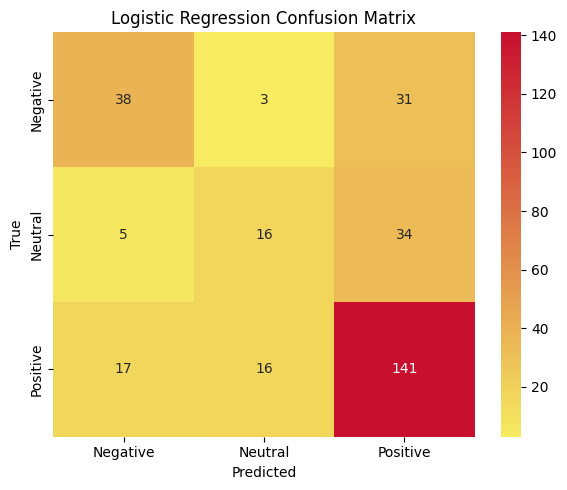


📊 Naive Bayes Evaluation
----------------------------------------
Train Accuracy: 0.9613
Test Accuracy : 0.5814

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.57      0.54      0.55        72
     Neutral       0.28      0.36      0.32        55
    Positive       0.72      0.67      0.69       174

    accuracy                           0.58       301
   macro avg       0.52      0.52      0.52       301
weighted avg       0.60      0.58      0.59       301



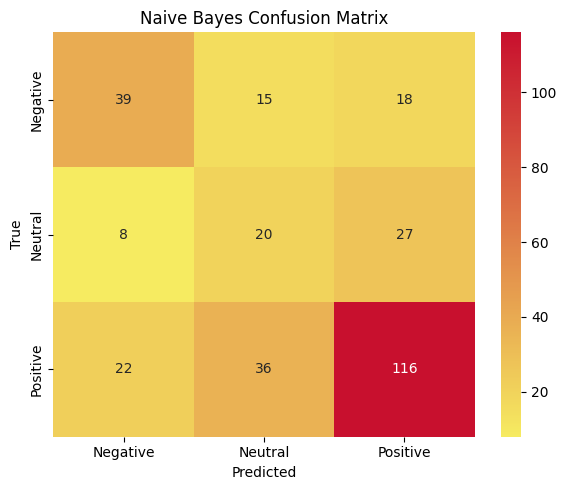

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import LinearSegmentedColormap

sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
lfc_stm['label'] = lfc_stm['new_sentiment'].map(sentiment_mapping)

class_names = ["Negative", "Neutral", "Positive"]

train_df, test_df = train_test_split(
    lfc_stm[['clean_news_st', 'label']],
    test_size=0.3,
    stratify=lfc_stm['label'],
    random_state=42
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_raw = train_df['clean_news_st'].fillna("")
X_test_raw = test_df['clean_news_st'].fillna("")

X_train = tfidf.fit_transform(X_train_raw)
y_train = train_df['label'].values

X_test = tfidf.transform(X_test_raw)
y_test = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

colors = ["#F6EB61", "#C8102E"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red_yellow", colors, N=256)

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n📊 {name} Evaluation")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("-" * 40)
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
    print("Test Accuracy :", round(accuracy_score(y_test, y_test_pred), 4))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = MultinomialNB()

evaluate_model(
    "Logistic Regression",
    lr_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)

evaluate_model(
    "Naive Bayes",
    nb_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)

<ipython-input-34-99d57b9d4d68>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_all.index, y=dist_all.values, ax=axes[0], palette=[color_map[label] for label in label_order], order=label_order)
<ipython-input-34-99d57b9d4d68>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_head.index, y=dist_head.values, ax=axes[1], palette=[color_map[label] for label in label_order], order=label_order)


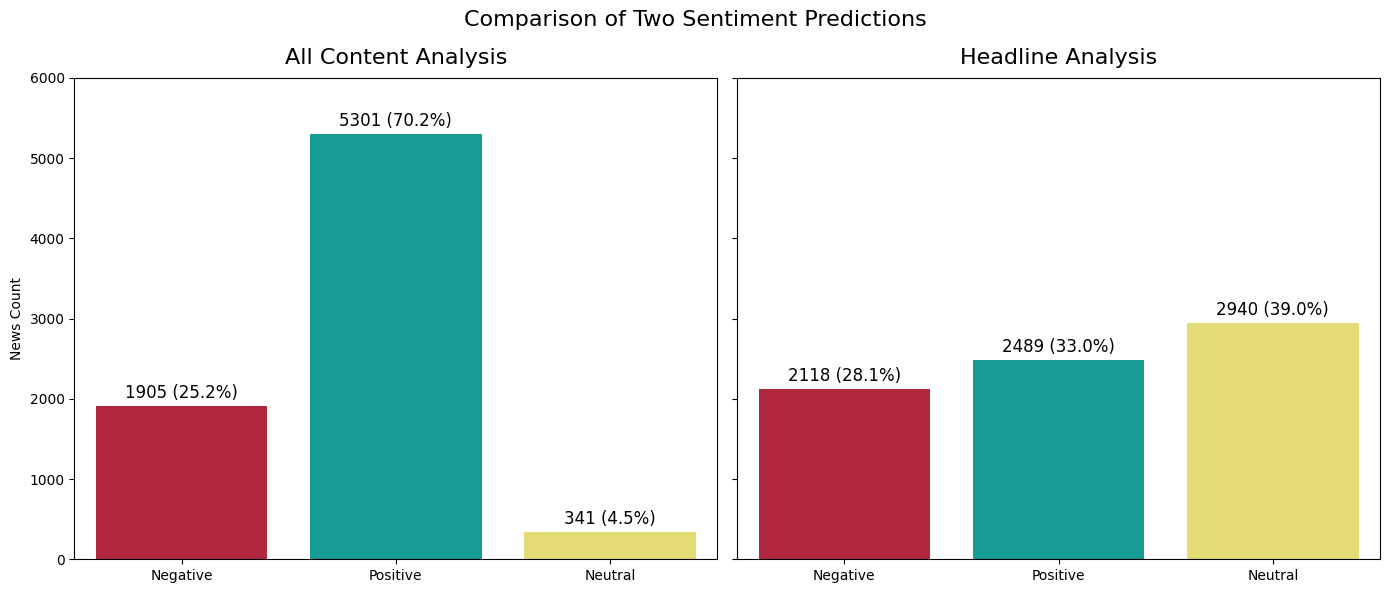

In [ ]:
color_map = {
    "Negative": "#C8102E",
    "Positive": "#00B2A9",
    "Neutral": "#F6EB61",
}

def compare_two_sentiment_cols(df, col_all, col_head, label_order, max_y=6000, label_offset=30):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    dist_all = df[col_all].value_counts()
    dist_head = df[col_head].value_counts()

    total_all = dist_all.sum()
    sns.barplot(x=dist_all.index, y=dist_all.values, ax=axes[0], palette=[color_map[label] for label in label_order], order=label_order)
    for i, v in enumerate(dist_all[label_order]):
        axes[0].text(i, v + label_offset, f"{v} ({v/total_all:.1%})", ha='center', fontsize=12)

    axes[0].set_title("All Content Analysis", fontsize=16, pad=10)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("News Count")
    axes[0].set_ylim(0, max_y)

    total_head = dist_head.sum()
    sns.barplot(x=dist_head.index, y=dist_head.values, ax=axes[1], palette=[color_map[label] for label in label_order], order=label_order)
    for i, v in enumerate(dist_head[label_order]):
        axes[1].text(i, v + label_offset, f"{v} ({v/total_head:.1%})", ha='center', fontsize=12)

    axes[1].set_title("Headline Analysis", fontsize=16, pad=10)
    axes[1].set_xlabel("")
    axes[1].set_ylabel("Count")
    axes[1].set_ylim(0, max_y)

    fig.suptitle("Comparison of Two Sentiment Predictions", fontsize=16)
    plt.tight_layout()
    plt.show()

label_order = ["Negative", "Positive", "Neutral"]
compare_two_sentiment_cols(df=lfc_df, col_all="twt_rbt_pred", col_head="twt_rbt_pred_head", label_order=label_order, max_y=6000, label_offset=100)

<ipython-input-33-fe02015fbcfd>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-33-fe02015fbcfd>:28: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
<ipython-input-33-fe02015fbcfd>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neg_df.index, x=neg_df.values, ax=axes[1],palette=["#C8102E"])
<ipython-input-33-fe02015fbcfd>:39: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=neg_df.index, x=neg_df.values, ax=axes[1],palette=["#C8102E"])


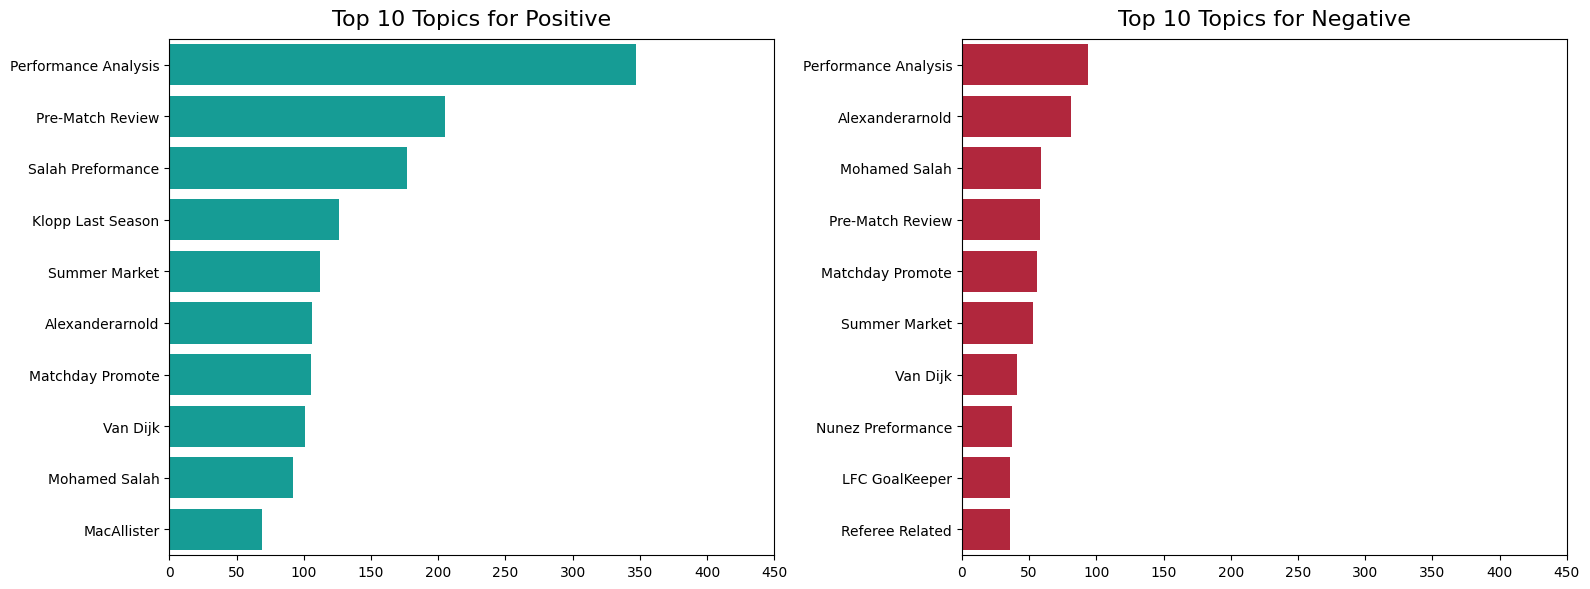

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lda_topic_mapping = {"Salah Contract Renew": "Mohamed Salah", "LFC Derby Drama": "Performance Analysis",}
lfc_df["lda_topic"] = lfc_df["lda_topic"].replace(lda_topic_mapping)

def plot_top_topics_by_sentiment(df, topic_col="lda_topic", sentiment_col="new_sentiment", pos_label="Positive", neg_label="Negative", top_n=10):

    pos_df = (
        df[df[sentiment_col] == pos_label]
        .groupby(topic_col)
        .size()
        .sort_values(ascending=False)
        .head(top_n)
    )

    neg_df = (
        df[df[sentiment_col] == neg_label]
        .groupby(topic_col)
        .size()
        .sort_values(ascending=False)
        .head(top_n)
    )

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    sns.barplot(
        y=pos_df.index,
        x=pos_df.values,
        ax=axes[0],
        palette=["#00B2A9"]
    )
    axes[0].set_title(f"Top {top_n} Topics for {pos_label}", fontsize=16, pad=10)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")
    axes[0].tick_params(axis='y', labelsize=10)

    sns.barplot(y=neg_df.index, x=neg_df.values, ax=axes[1],palette=["#C8102E"])
    axes[1].set_title(f"Top {top_n} Topics for {neg_label}", fontsize=16, pad=10)
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")
    axes[1].tick_params(axis='y', labelsize=10)

    axes[0].set_xlim(0, 450)
    axes[1].set_xlim(0, 450)

    plt.tight_layout()
    plt.show()

plot_top_topics_by_sentiment(df=lfc_df, topic_col="lda_topic", sentiment_col="twt_rbt_pred", pos_label="Positive", neg_label="Negative", top_n=10)

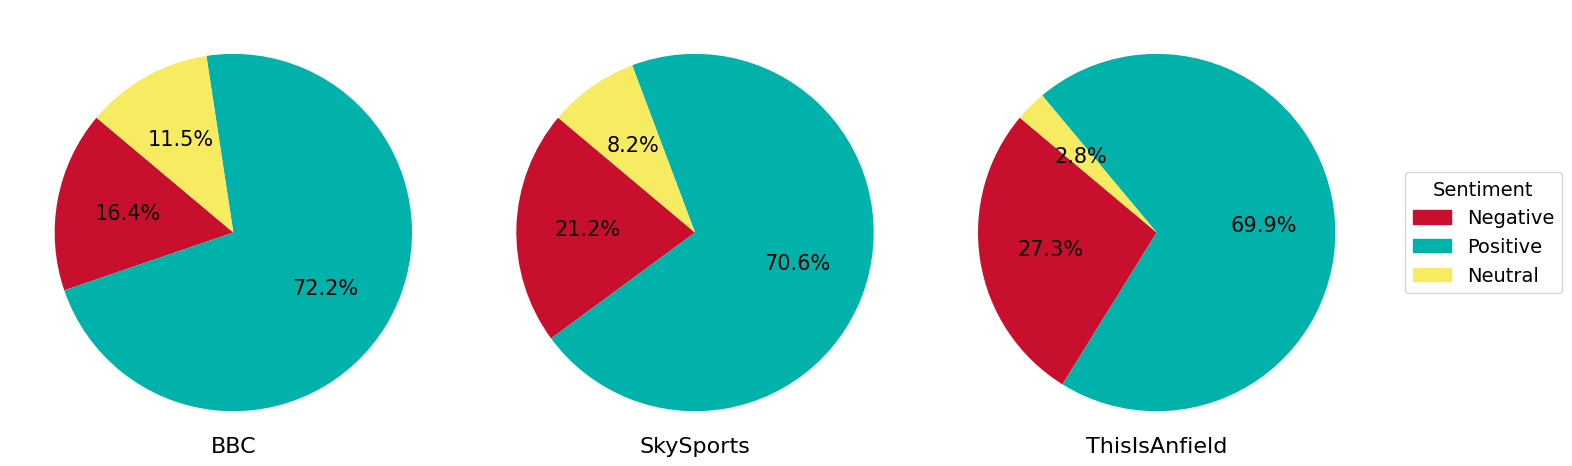

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_pie_per_reporter_custom_spacing(
    df,
    sentiment_col="twt_rbt_pred",
    reporter_col="reporter",
    label_order=None,
    color_map=None,
    ncols=3,
    figsize=(14, 7),
    title_fontsize=16,
    autopct_fontsize=14,
    legend_fontsize=14,
    startangle=140,
    wspace=0.2,
    legend_anchor=(1.0, 0.5)
):

    if color_map is None:
        color_map = {
            "Negative": "#C8102E",
            "Positive": "#00B2A9",
            "Neutral":  "#F6EB61",
        }
    if label_order is None:
        label_order = list(color_map.keys())

    handles = [mpatches.Patch(color=color_map[l], label=l) for l in label_order]

    reporters = df[reporter_col].unique()
    num_reporters = len(reporters)

    nrows = math.ceil(num_reporters / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    else:
        axes = axes.flatten()

    fig.subplots_adjust(wspace=wspace)

    idx = 0
    for rep in reporters:
        ax = axes[idx]
        idx += 1

        dist = df.loc[df[reporter_col] == rep, sentiment_col].value_counts()
        dist = dist.reindex(label_order, fill_value=0)

        counts = dist.values
        pie_colors = [color_map[l] for l in label_order]

        wedges, texts, autotexts = ax.pie(
            counts,
            labels=None,
            colors=pie_colors,
            autopct="%.1f%%",
            startangle=startangle
        )

        for t in autotexts:
            t.set_fontsize(autopct_fontsize)

        ax.set_title(
            str(rep),
            y=-0.01,
            fontsize=title_fontsize
        )

    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    fig.legend(
        handles=handles,
        loc="center left",
        bbox_to_anchor=legend_anchor,
        title="Sentiment",
        title_fontsize=legend_fontsize,
        prop={"size": legend_fontsize}
    )

    plt.tight_layout()
    plt.show()

color_map = {
    "Negative": "#C8102E",
    "Positive": "#00B2A9",
    "Neutral":  "#F6EB61",
}
label_order = ["Negative", "Positive", "Neutral"]

plot_pie_per_reporter_custom_spacing(
    df=lfc_df,
    sentiment_col="twt_rbt_pred",
    reporter_col="reporter",
    label_order=label_order,
    color_map=color_map,
    ncols=3,
    figsize=(14, 7),
    title_fontsize=16,
    autopct_fontsize=15,
    legend_fontsize=14,
    startangle=140,
    wspace=0.2,
    legend_anchor=(1.0, 0.5)
)

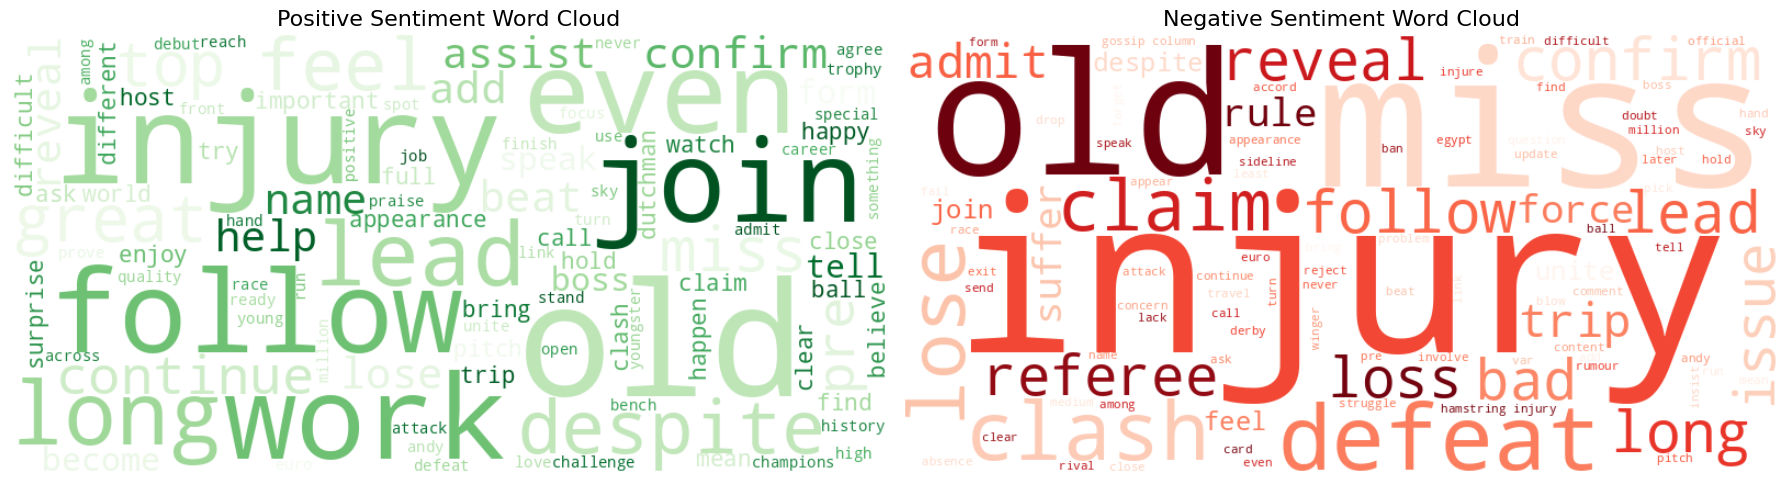

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_texts = lfc_df[lfc_df["twt_rbt_pred"] == "Positive"]["clean_news_st"].dropna().tolist()
negative_texts = lfc_df[lfc_df["twt_rbt_pred"] == "Negative"]["clean_news_st"].dropna().tolist()

positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)

positive_wc = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens',
    max_words=100
).generate(positive_text)

negative_wc = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',
    max_words=100
).generate(negative_text)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(positive_wc, interpolation='bilinear')
axes[0].set_title("Positive Sentiment Word Cloud", fontsize=16)
axes[0].axis("off")

axes[1].imshow(negative_wc, interpolation='bilinear')
axes[1].set_title("Negative Sentiment Word Cloud", fontsize=16)
axes[1].axis("off")

plt.tight_layout()
plt.show()


📊 Logistic Regression Evaluation
----------------------------------------
Train Accuracy: 0.8939
Test Accuracy : 0.6728

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.63      0.65      0.64       538
     Neutral       0.53      0.52      0.53       653
    Positive       0.78      0.78      0.78      1074

    accuracy                           0.67      2265
   macro avg       0.65      0.65      0.65      2265
weighted avg       0.67      0.67      0.67      2265



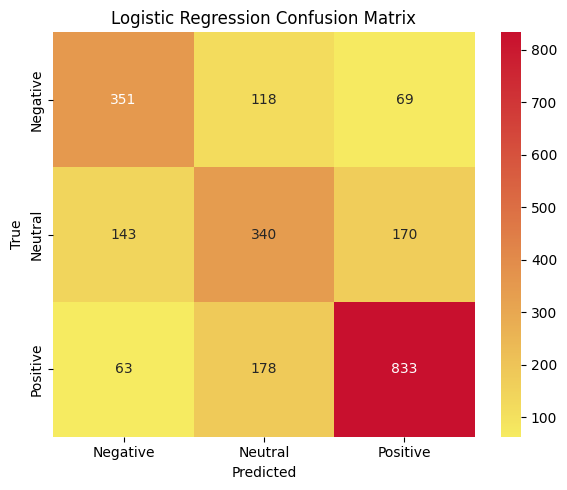


📊 Naive Bayes Evaluation
----------------------------------------
Train Accuracy: 0.8056
Test Accuracy : 0.6415

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.58      0.63      0.60       538
     Neutral       0.51      0.50      0.50       653
    Positive       0.76      0.73      0.75      1074

    accuracy                           0.64      2265
   macro avg       0.62      0.62      0.62      2265
weighted avg       0.64      0.64      0.64      2265



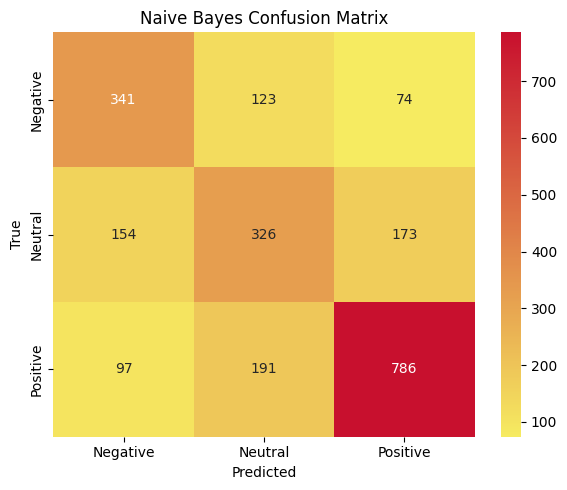

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
lfc_df['label'] = lfc_df['twt_rbt_pred'].map(sentiment_mapping)

class_names = ["Negative", "Neutral", "Positive"]

train_df, test_df = train_test_split(
    lfc_df[['clean_news_st', 'label']],
    test_size=0.3,
    stratify=lfc_df['label'],
    random_state=42
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_raw = train_df['clean_news_st'].fillna("")
X_test_raw = test_df['clean_news_st'].fillna("")

X_train = tfidf.fit_transform(X_train_raw)
y_train = train_df['label'].values

X_test = tfidf.transform(X_test_raw)
y_test = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

colors = ["#F6EB61", "#C8102E"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red_yellow", colors, N=256)

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n📊 {name} Evaluation")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("-" * 40)
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
    print("Test Accuracy :", round(accuracy_score(y_test, y_test_pred), 4))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = MultinomialNB()

evaluate_model(
    "Logistic Regression",
    lr_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)

evaluate_model(
    "Naive Bayes",
    nb_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)


📊 Logistic Regression Evaluation
----------------------------------------
Train Accuracy: 0.8967
Test Accuracy : 0.6751

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.63      0.66      0.65       459
     Neutral       0.56      0.55      0.56       697
    Positive       0.76      0.76      0.76      1109

    accuracy                           0.68      2265
   macro avg       0.65      0.66      0.65      2265
weighted avg       0.68      0.68      0.67      2265



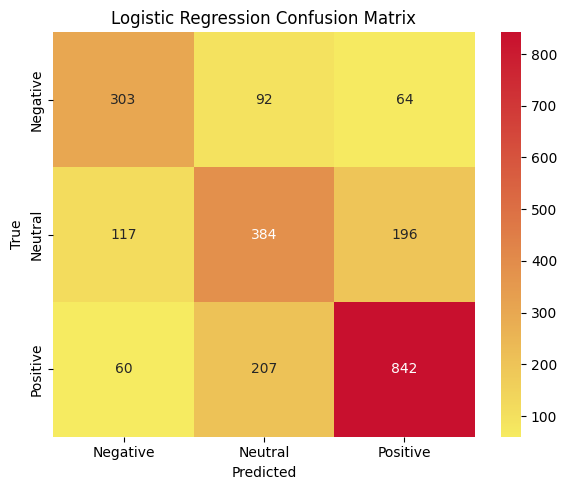


📊 Naive Bayes Evaluation
----------------------------------------
Train Accuracy: 0.8176
Test Accuracy : 0.6358

Classification Report (Test):
              precision    recall  f1-score   support

    Negative       0.57      0.69      0.62       459
     Neutral       0.52      0.52      0.52       697
    Positive       0.75      0.69      0.72      1109

    accuracy                           0.64      2265
   macro avg       0.61      0.63      0.62      2265
weighted avg       0.64      0.64      0.64      2265



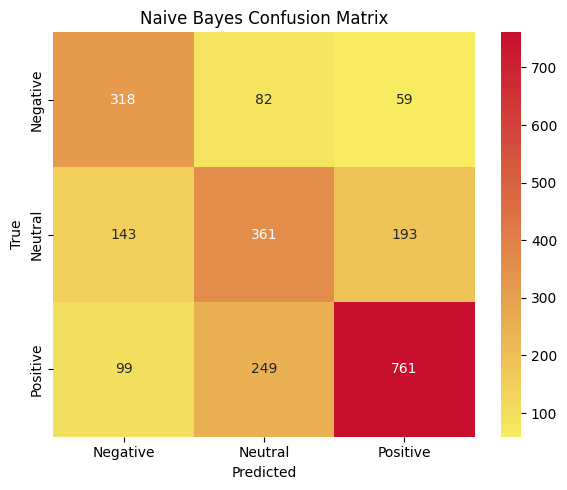

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
lfc_df['label'] = lfc_df['twt_rbt_pred'].map(sentiment_mapping)

class_names = ["Negative", "Neutral", "Positive"]

train_df, test_df = train_test_split(
    lfc_df[['clean_news_st', 'label']],
    test_size=0.3,
    stratify=lfc_df['label'],
    random_state=42
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_raw = train_df['clean_news_st'].fillna("")
X_test_raw = test_df['clean_news_st'].fillna("")

X_train = tfidf.fit_transform(X_train_raw)
y_train = train_df['label'].values

X_test = tfidf.transform(X_test_raw)
y_test = test_df['label'].values

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

colors = ["#F6EB61", "#C8102E"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red_yellow", colors, N=256)

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n📊 {name} Evaluation")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("-" * 40)
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
    print("Test Accuracy :", round(accuracy_score(y_test, y_test_pred), 4))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = MultinomialNB()

evaluate_model(
    "Logistic Regression",
    lr_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)

evaluate_model(
    "Naive Bayes",
    nb_model,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test
)

In [ ]:
stopwords_data = {
    'Category': [
        'Coaching Staff (2023–2025)', 'Common football terms', 'Tournament Name', 'Days of the week and time-related words',
        'Months of the year', 'Common football/journalistic phrases', 'Managerial words', 'Number',
        'General Filler Words', 'Other unnecessary terms', 'Liverpool-related terms', 'Fenway Sports Group (FSG) & Key Personnel',
        'Player names', 'Liverpool FC Opponents from January 2024 to March 2025', 'UEFA Champions League & Europa League Opponents'
    ],
    'Custom Stopword': [
        # Coaching Staff (2023–2025)
        'jurgen, klopp, klopps, pepijn, lijnders, peter, krawietz, john, achterberg, claudio, taffarel, andreas, kornmayer, arne, slot, sipke, hulshoff, john, heitinga, fabian, otte, claudio, taffarel, aaron, briggs, jonathan, power, lee, nobes, conall, murtagh, ruben, peeters, chris, morgan, amit, pannu, robin, sadler, paul, small, lee, radcliffe, brendan, mcilduff, david, rydings, mona, nemmer, james, french, chris, black, joe, lewis, clare, farrell, yinka, ademuyiwa, michelle, hudson, lynsey, ahmed',

        # Common football terms
        'match, goal, win, team, game, club, cup, season, player, manager, centre, back, football, wembley, squad, side, performance, victory, score, final, campaign, start, position, result, supporter, end, sport, defender, midfielder, forward, captain, goalkeeper, playmaker, teammate, fixture, fan, point, striker, draw, competition, title, training, sign, signing, deal, offer, loan, penalty, scored, transfer, window',

        # Tournament Name
        'premier, league, ucl, europa, carabao, fa, uefa, fifa, championship, champion',

        # Days of the week and time-related words
        'sunday, saturday, wednesday, friday, tuesday, monday, thursday, weekend, year, night, evening, afternoon, morning, preseason',

        # Months of the year
        'january, february, march, april, may, june, july, august, september, october, november, december',

        # Common football/journalistic phrases
        'last, summer, may, made, confirmed, following, next, take, put, left, face, level, lot, half, record, former, strong, contract, likely, expect, number, report, weekend, home, away, say, told, early, break, international, keep, kept',

        # Managerial words
        'coach, head, role, manager',

        # Number
        'two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty',

        # General Filler Words
        'one, back, away, though, far, way, big, moment, move, made, take, news, time, plan, really, change, need, always, think, given, england, big, man',

        # Other unnecessary terms
        'yearold, today, yesterday, tomorrow, said, says, week, month, day, already, new, thing, still, good, best, first, second, time, minute, another, expected, well, thought, want, await, going, know, needed, return, start, change, talk, chance, show, play, played, everything, every',

        # Liverpool-related terms
        'liverpool, lfc, anfield, axa, carabao, reds, kop, scouser, ynwa, merseyside, red',

        # Fenway Sports Group (FSG) & Key Personnel
        'fsg, fenway, sports, group, john, henry, tom, werner, michael, gordon, sam, kennedy, lebron, james, maverick, carter, paul, wachter, adam, grossman, ryan, fischer, theo, epstein, billy, hogan, ed, weiss, julie, swinehart',

        # Player names
        'alisson, adrian, caoimhin, kelleher, trent, alexanderarnold, alexander, arnold, joe, gomez, virgil, van, dijk, ibrahima, konate, joel, matip, mohamen, andrew, robertson, kostas, tsimikas, nat, phillips, rhys, williams, jarell, quansah, conor, bradley, amara, nallo, wataru, endo, thiago, dominik, szoboszlai, alexis, mac, allister, curtis, jones, harvey, elliott, ryan, gravenberch, tyler, morton, bobby, clark, stefan, bajcetic, james, mcconnell, luis, diaz, darwin, nunez, mohamed, salah, diogo, jota, cody, gakpo, federico, chiesa, kaide, gordon, ben, doak, lewis, koumas, jayden, danns, vitezslav, jaros, harvey, davies',

        # Liverpool FC Opponents from January 2024 to March 2025
        'newcastle, united, afc, bournemouth, chelsea, arsenal, burnley, brentford, luton, town, nottingham, forest, manchester, city, brighton, hove, albion, sheffield, crystal, palace, fulham, everton, west, ham, tottenham, hotspur, aston, villa, wolverhampton, wanderers, ipswich, southampton, leicester, wolf',

        # UEFA Champions League & Europa League Opponents
        'milan, bologna, rb, leipzig, real, madrid, girona, psv, eindhoven, lille, psg, paris, saintgermain, lask, union, gilloise, toulouse, sparta, prague, atalanta, leverkusen'
    ]
}

df_st = pd.DataFrame(stopwords_data)

df_st.to_excel('custom_stopwords_categories.xlsx', index=False)